In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

In [93]:
dp=pd.read_csv("IMDB Dataset.csv")

In [94]:
dp.shape

(50000, 2)

In [95]:
dp.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [96]:
dp.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [97]:
dp['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

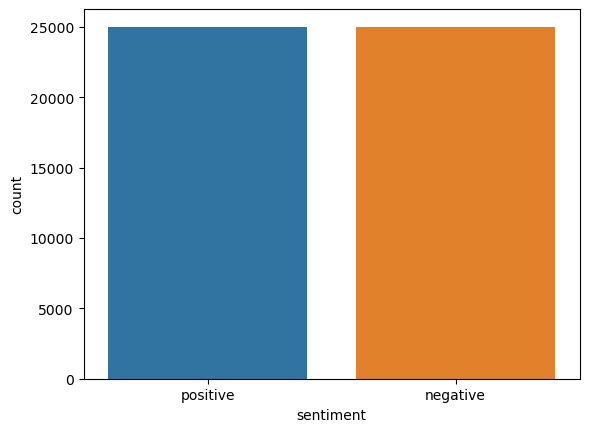

In [98]:
import seaborn as sns
sns.countplot(x='sentiment', data=dp)


In [99]:
dp.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

In [100]:
dp.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [101]:
dp['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mugilmr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
tag_re = re.compile(r'<[^>]+>')
def remove_tags(text):
    return tag_re.sub('', text)

In [104]:
def preprocess_text(sen):
    #lowercase
    sentence=sen.lower()
    #remove tags
    sentence=remove_tags(sentence)
    #remove punctuation and number
    sentence=re.sub('[^a-zA-Z]',' ',sentence)
    #remove single characters
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    #remove extra space
    sentence = re.sub(r'\s+', ' ', sentence) 
    #remove stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [121]:
# X = []
# sentences = list(dp['review'])
# for sen in sentences:
#     X.append(custom.preprocess_text(sen))

In [105]:
train_data, test_data = train_test_split(dp,test_size=0.2,random_state=42)

In [106]:
train_data.shape

(40000, 2)

In [107]:
test_data.shape

(10000, 2)

Data preprocessing

In [108]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen=200)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen=200)

In [109]:
print(x_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [110]:
print(x_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [111]:
y_train=train_data['sentiment']
y_test=test_data['sentiment']

In [112]:
print(y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [113]:
print(y_test)

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


LSTM

In [114]:
model = Sequential()
model.add(Embedding(input_dim=5000,output_dim=128))
model.add(LSTM(128,dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

In [115]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [127]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (64, 200, 128)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (64, 128)              │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 1)                │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,315,141 (8.83 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,543,428 (5.89 MB)

None


In [157]:
model.fit(x_train,y_train,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 112s 446ms/step - accuracy: 0.8897 - loss: 0.2752 - val_accuracy: 0.8845 - val_loss: 0.2855
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 115s 459ms/step - accuracy: 0.9129 - loss: 0.2213 - val_accuracy: 0.8845 - val_loss: 0.2878
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 408ms/step - accuracy: 0.9297 - loss: 0.1860 - val_accuracy: 0.8817 - val_loss: 0.3109
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 407ms/step - accuracy: 0.9431 - loss: 0.1512 - val_accuracy: 0.8852 - val_loss: 0.3163
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 417ms/step - accuracy: 0.9523 - loss: 0.1325 - val_accuracy: 0.8811 - val_loss: 0.3295


In [158]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.8779 - loss: 0.3192


[0.31748658418655396, 0.8805000185966492]

In [ ]:
def predict_sentiment(review):
    sequence=tokenizer.texts_to_sequences([review])
    padding=pad_sequences(sequence,maxlen=200)
    prediction=model.predict(padding)
    sentiment='positive' if prediction[0]>0.5 else 'negative'
    return sentiment

In [ ]:
new_review="I liked the movie very much"
sentiment=predict_sentiment(new_review)
print(sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
positive


In [ ]:
new_review="I did not like the movie story"
sentiment=predict_sentiment(new_review)
print(sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
negative


SNN

In [137]:
vocab_length = len(tokenizer.word_index) + 1

vocab_length

112281

In [138]:
from keras.layers import Conv1D,GlobalMaxPooling1D

In [176]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 128, input_length=200 , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

/Users/mugilmr/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [177]:
snn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [180]:
print(snn_model.summary())

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (128, 200, 128)        │    14,371,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (128, 25600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (128, 1)               │        25,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,448,773 (55.12 MB)

 Trainable params: 25,601 (100.00 KB)

 Non-trainable params: 14,371,968 (54.82 MB)

 Optimizer params: 51,204 (200.02 KB)

None


In [179]:
snn_model.fit(x_train,y_train,batch_size=128,epochs=5,validation_split=0.2)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5360 - loss: 0.6897 - val_accuracy: 0.5723 - val_loss: 0.6775
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6891 - loss: 0.6493 - val_accuracy: 0.6252 - val_loss: 0.6616
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7395 - loss: 0.6152 - val_accuracy: 0.6285 - val_loss: 0.6536
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7509 - loss: 0.5932 - val_accuracy: 0.6373 - val_loss: 0.6460
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7692 - loss: 0.5705 - val_accuracy: 0.6379 - val_loss: 0.6414


In [181]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8779 - loss: 0.3192


[0.31748658418655396, 0.8805000185966492]

CNN

In [159]:
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 128,input_length=200 , trainable=False)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128,5,activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1,activation='sigmoid'))

/Users/mugilmr/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [160]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [161]:
print(snn_model.summary())

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (128, 200, 100)        │    11,228,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (128, 20000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (128, 1)               │        20,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,288,105 (43.06 MB)

 Trainable params: 20,001 (78.13 KB)

 Non-trainable params: 11,228,100 (42.83 MB)

 Optimizer params: 40,004 (156.27 KB)

None


In [174]:
cnn_model.fit(x_train,y_train,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.6140 - loss: 0.6698 - val_accuracy: 0.7471 - val_loss: 0.5461
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.7517 - loss: 0.5224 - val_accuracy: 0.7859 - val_loss: 0.4724
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.8022 - loss: 0.4415 - val_accuracy: 0.8035 - val_loss: 0.4345
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8277 - loss: 0.3919 - val_accuracy: 0.8170 - val_loss: 0.4104
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8542 - loss: 0.3533 - val_accuracy: 0.8263 - val_loss: 0.3922


In [175]:
cnn_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8255 - loss: 0.3823


[0.3786986470222473, 0.8309999704360962]

vadarsentiment

In [184]:
!pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:0000:010:01


In [185]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()

In [190]:
emptyline=[]
for row in dp['review']:
    vs=analyser.polarity_scores(row)
    emptyline.append(vs)
dp_sentiments=pd.DataFrame(emptyline)
dp_sentiments.head()

,neg,neu,pos,compound
0,0.179,0.756,0.064,-0.9916
1,0.052,0.773,0.176,0.9670
2,0.114,0.688,0.198,0.9519
3,0.125,0.816,0.059,-0.9213
4,0.050,0.806,0.144,0.9744


In [192]:
df_c = pd.concat([dp.reset_index(drop=True), dp_sentiments], axis=1)
df_c.head(3)

,review,sentiment,neg,neu,pos,compound
0,One of the other reviewers has mentioned that ...,1,0.179,0.756,0.064,-0.9916
1,A wonderful little production. <br /><br />The...,1,0.052,0.773,0.176,0.9670
2,I thought this was a wonderful way to spend ti...,1,0.114,0.688,0.198,0.9519


In [195]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,review,sentiment,neg,neu,pos,compound,Sentiment
0,One of the other reviewers has mentioned that ...,1,0.179,0.756,0.064,-0.9916,Negative
1,A wonderful little production. <br /><br />The...,1,0.052,0.773,0.176,0.9670,Positive
2,I thought this was a wonderful way to spend ti...,1,0.114,0.688,0.198,0.9519,Positive
3,Basically there's a family where a little boy ...,0,0.125,0.816,0.059,-0.9213,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,0.050,0.806,0.144,0.9744,Positive


In [196]:
df_c.tail()

,review,sentiment,neg,neu,pos,compound,Sentiment
49995,I thought this movie did a down right good job...,1,0.045,0.765,0.189,0.9886,Positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,0.160,0.730,0.110,-0.6837,Negative
49997,I am a Catholic taught in parochial elementary...,0,0.181,0.704,0.115,-0.9734,Negative
49998,I'm going to have to disagree with the previou...,0,0.116,0.804,0.080,-0.8657,Negative
49999,No one expects the Star Trek movies to be high...,0,0.118,0.734,0.148,0.6975,Positive


In [201]:
result=df_c['Sentiment'].value_counts()


Sentiment
Positive    33279
Negative    16721
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

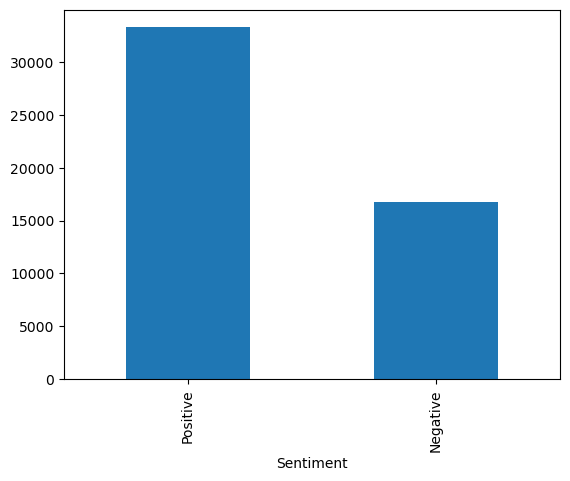

In [205]:
result.plot(kind='bar')